In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [2]:
def print_percentiles(c, name):
	print('percentile values distribution for %s' % name)

	print('50th Percentile:%f' % c.Percentile(50))
	print('90th Percentile:%f' % c.Percentile(90))
	print('99th Percentile:%f' % c.Percentile(99))
	print('25th Percentile:%f' % c.Percentile(25))
	print('75th Percentile:%f' % c.Percentile(75))
	print('20th Percentile:%f' % c.Percentile(20))
	print('40th Percentile:%f' % c.Percentile(40))
	print('60th Percentile:%f' % c.Percentile(60))
	print('80th Percentile:%f' % c.Percentile(80))

	print('-----------------------------')

In [3]:
total_bandwidth=12.4

In [4]:
%autosave 0

Autosave disabled


In [5]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
tcp_tls_data = "./data/pi-1/gdrive/output_curl_gdrive.csv"
quic_data = "./data/pi-1/gdrive/output_quic_gdrive.csv"
gdrive = "./data/pi-1/gdrive/gdrive_id.csv"

In [8]:
t = pd.read_csv(quic_data,';')
s = pd.read_csv(tcp_tls_data,';')
gd = pd.read_csv(gdrive, ',')

In [9]:
t = t.dropna()
s=s.dropna()
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [10]:
import re
def extract_id(path):
    id = re.search('\*\/(.*)\?', path)
    return id.group(1)

In [11]:
t['id'] = t['Path'].apply(extract_id)

In [12]:
import re
def substitute(string):
    replaced = string
    if re.search('K', string):
        replaced = re.sub('K','', string)
    if re.search('M', string):
        replaced = re.sub('M','000', string)
    if re.search('G', string):
        replaced = re.sub('G','000000', string)
    return replaced

In [13]:
gd['size'] = gd['size'].apply(substitute)

In [14]:
s['id'] = s['Url'].apply(extract_id)

In [15]:
t['Url'] = t['Url'] + t['Path']

In [16]:
t = t.join(gd.set_index('id'), on='id', rsuffix='_right')

In [17]:
s = s.join(gd.set_index('id'), on='id', rsuffix='_right')

In [18]:
t['size'] = t['size'].astype(int)
s['size'] = s['size'].astype(int)

In [19]:
t['Throughput'] = (t['size']/(t['TotalDownloadTime']))
#t['Throughput'] = (t['size']/(t['TotalDownloadTime'] - t['TTFB']))

In [20]:
s['Throughput'] = (s['size']/(s['TotalDownloadTime']))
#s['Throughput'] = (s['size']/(s['TotalDownloadTime'] -s['TTFB']))

In [21]:
gd.head()

,size,id
0,1,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6
1,2,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM
2,5,1sGGy4K1J3p0OQlLxUgbgsErokyBADg6g
3,10,1k7mg8XpQmW-jpO85yq3giwVUeL82NJhx
4,20,1Zr-g4qROFzaq_vZ4JnHneEb9JyRSUBXb


In [22]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
0,1549762123,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,5.613,112.622,361.426,365.887,200,Q044,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6,1,0.002733
1,1549762123,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,3.288,93.045,348.857,353.291,200,Q043,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6,1,0.002831
2,1549762124,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,2.788,137.519,314.036,318.552,200,Q039,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6,1,0.003139
3,1549762125,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,3.335,133.373,456.045,460.569,200,Q044,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM,2,0.004342
4,1549762125,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,3.054,93.277,403.432,408.039,200,Q043,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM,2,0.004901


In [23]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
1135,1549788031,doc-14-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.22.1,443,3.251,92.013,453.513,95178.540,200,Q043,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,10.506570
1136,1549788126,doc-14-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,2.788,93.471,347.506,95597.877,200,Q039,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,10.460483
1137,1549788252,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,3.099,93.377,546.428,227867.017,200,Q044,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,8.777049
1138,1549788480,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.210.1,443,3.416,92.151,338.358,184963.336,200,Q043,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,10.812954
1139,1549788665,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,3.045,92.908,376.564,188727.482,200,Q039,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,10.597291


In [24]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
0,1549762125,doc-10-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.421,10.035,294.630,483.159,483.426,200,HTTP/1.1,TCP/TLS1.2,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6,1,0.002069
1,1549762126,doc-0g-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.424,10.113,294.400,469.599,470.192,200,HTTP/1.1,TCP/TLS1.2,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM,2,0.004254
2,1549762128,doc-0o-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,12.810,10.342,328.205,587.375,589.150,200,HTTP/1.1,TCP/TLS1.2,1sGGy4K1J3p0OQlLxUgbgsErokyBADg6g,5,0.008487
3,1549762129,doc-0s-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.436,10.490,339.189,518.752,521.179,200,HTTP/1.1,TCP/TLS1.2,1k7mg8XpQmW-jpO85yq3giwVUeL82NJhx,10,0.019187
4,1549762131,doc-08-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.423,10.100,293.994,562.006,573.032,200,HTTP/1.1,TCP/TLS1.2,1Zr-g4qROFzaq_vZ4JnHneEb9JyRSUBXb,20,0.034902


In [25]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
374,1549802485,doc-14-4c-docs.googleusercontent.com/docs/secu...,172.217.21.193,443,4.424,9.825,295.669,608.405,91709.409,200,HTTP/1.1,TCP/TLS1.2,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,10.904007
375,1549802668,doc-0g-4c-docs.googleusercontent.com/docs/secu...,172.217.22.1,443,4.460,11.477,297.928,620.020,183022.542,200,HTTP/1.1,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,10.927616
376,1549802714,doc-0o-4c-docs.googleusercontent.com/docs/secu...,172.217.22.1,443,4.426,9.891,296.619,583.408,46135.663,200,HTTP/1.1,TCP/TLS1.2,1XSSiVM3jWJC09nZxWAYkYMgtGUwCfuEI,500000,10.837603
377,1549802806,doc-14-4c-docs.googleusercontent.com/docs/secu...,172.217.22.1,443,4.430,9.860,296.873,568.959,91581.231,200,HTTP/1.1,TCP/TLS1.2,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,10.919268
378,1549802988,doc-0g-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.434,10.190,297.373,536.353,182738.298,200,HTTP/1.1,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,10.944613


In [26]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [27]:
quic4, quic6 = filter_by_ip(t, column = 'Ip')

In [28]:
tcp4, tcp6 = filter_by_ip(s, column = 'Ip')

In [29]:
quic4 = quic4.loc[quic4['size']>499]
tcp4 = tcp4.loc[tcp4['size']>499]

In [30]:
quic44 = quic4.loc[t['Protocol'] == 'Q044']
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic39 = quic4.loc[t['Protocol'] == 'Q039']
quic35 = quic4.loc[t['Protocol'] == 'Q035']

In [31]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']

In [32]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [33]:
x2 =Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

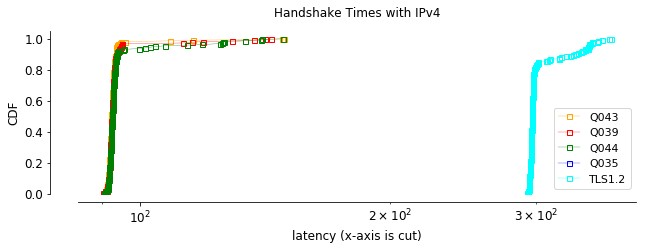

In [34]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20, 100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/PI/gdrive/handshake_times_ipv4.png', format='png', bbox_inches='tight')


In [35]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

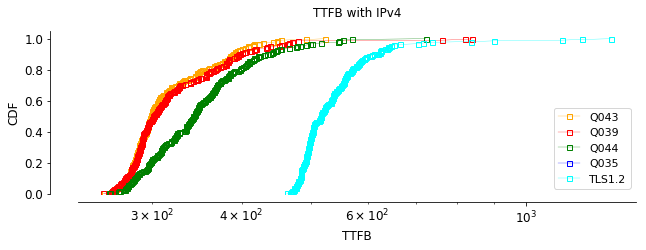

In [36]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100, 600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/PI/gdrive/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [37]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [38]:
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

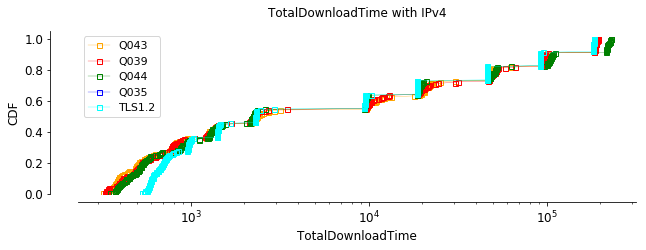

In [39]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100,800])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/PI/gdrive/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')

In [40]:
x = Cdf.MakeCdfFromList(quic43['Throughput'].values)
x1 =Cdf.MakeCdfFromList(quic39['Throughput'].values)
x3 = Cdf.MakeCdfFromList(quic44['Throughput'].values)
x5 = Cdf.MakeCdfFromList(quic35['Throughput'].values)
x2 =Cdf.MakeCdfFromList(tcp12['Throughput'].values)

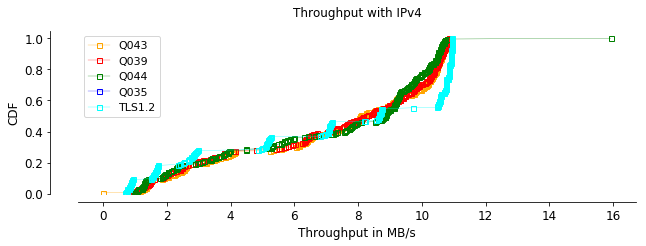

In [41]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([0,700])
#ax.set_xlim([0,10])
ax.set_xscale('linear')
ax.set_xlabel('Throughput in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Throughput with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/PI/gdrive/Throughput_ipv4.png', format='png', bbox_inches='tight')

In [42]:

print_percentiles(x3, 'Q044')
print_percentiles(x2, 'tcp12')

print_percentiles(x1, 'Q039')
print_percentiles(x, 'Q043')

percentile values distribution for Q044
50th Percentile:8.848606
90th Percentile:10.494498
99th Percentile:10.735768
25th Percentile:3.753092
75th Percentile:9.915678
20th Percentile:2.998195
40th Percentile:7.564108
60th Percentile:9.202722
80th Percentile:10.201898
-----------------------------
percentile values distribution for tcp12
50th Percentile:8.656570
90th Percentile:10.918665
99th Percentile:10.944613
25th Percentile:2.854790
75th Percentile:10.831877
20th Percentile:2.547514
40th Percentile:7.064407
60th Percentile:10.563587
80th Percentile:10.850331
-----------------------------
percentile values distribution for Q039
50th Percentile:8.237565
90th Percentile:10.646532
99th Percentile:10.797844
25th Percentile:3.750298
75th Percentile:10.265777
20th Percentile:2.950314
40th Percentile:7.062431
60th Percentile:9.300545
80th Percentile:10.376381
-----------------------------
percentile values distribution for Q043
50th Percentile:8.071886
90th Percentile:10.625341
99th Percen

In [43]:
#quic4 = quic4.sort_values('size')
#quic4 = quic4.loc[quic4['size']<200001]
#quic4 = quic4.loc[quic4['size']>9999]
#tcp4 = tcp4.loc[tcp4['size']>9999]

In [44]:
quic_mean44= quic44.groupby('size', as_index=False).mean()
quic_mean43= quic43.groupby('size', as_index=False).mean()
quic_mean39= quic39.groupby('size', as_index=False).mean()
quic_mean= quic4.groupby('size', as_index=False).mean()
tcp_mean= tcp4.groupby('size', as_index=False).mean()
quic_mean['size']= quic_mean['size'].astype(int)
tcp_mean['size']= tcp_mean['size'].astype(int)
#quic_mean = quic_mean[:-3]

In [45]:
quic_mean.head()

,size,TimeOfMeasurement,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Throughput
0,500,1.549764e+09,443.0,3.252567,95.797333,296.148867,897.312950,200.0,1.265234
1,1000,1.549764e+09,443.0,3.072517,94.160633,305.573233,455.970033,200.0,2.227320
2,2000,1.549764e+09,443.0,3.058300,96.660383,320.276467,610.046117,200.0,3.446516
3,5000,1.549764e+09,443.0,3.066583,94.791500,335.766650,858.064617,200.0,5.893942
4,10000,1.549764e+09,443.0,3.012850,92.471850,319.419100,1327.969283,200.0,7.564508


In [46]:
quic_mean.tail()

,size,TimeOfMeasurement,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Throughput
6,100000,1.549764e+09,443.0,2.967567,92.555650,326.781067,10399.081417,200.0,9.751550
7,200000,1.549764e+09,443.0,3.130167,92.416750,311.056050,21196.526367,200.0,9.682396
8,500000,1.549777e+09,443.0,4.224150,93.113217,353.384683,49709.825067,200.0,10.099818
9,1000000,1.549777e+09,443.0,3.693983,93.382117,369.571850,97483.365633,200.0,10.315814
10,2000000,1.549778e+09,443.0,3.708033,92.763433,395.423617,198174.188917,200.0,10.153485


In [47]:
tcp_mean.head()

,size,TimeOfMeasurement,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Throughput
0,500,1.549764e+09,443.0,7.41695,10.13590,324.37585,538.94695,606.18515,200.0,0.831112
1,1000,1.549764e+09,443.0,4.84775,10.01210,304.00925,501.01910,613.50085,200.0,1.633167
2,2000,1.549764e+09,443.0,6.53160,10.04470,319.76050,532.91440,737.51075,200.0,2.722360
3,5000,1.549764e+09,443.0,4.83300,9.99875,295.90030,536.45360,1011.07305,200.0,5.016691
4,10000,1.549764e+09,443.0,4.43295,10.03800,296.16080,494.70670,1414.47515,200.0,7.070518


In [48]:
tcp_mean.tail()

,size,TimeOfMeasurement,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Throughput
6,100000,1.549764e+09,443.0,4.834800,10.059750,300.750650,557.956850,9519.179200,200.0,10.508634
7,200000,1.549764e+09,443.0,5.248400,10.046500,296.216050,512.772250,18620.880200,200.0,10.740673
8,500000,1.549800e+09,443.0,6.088250,10.571350,301.770450,581.483500,46116.040750,200.0,10.842227
9,1000000,1.549800e+09,443.0,5.624700,10.690150,298.064400,596.649900,91836.706350,200.0,10.889811
10,2000000,1.549800e+09,443.0,6.119368,10.324421,296.951895,579.554789,182824.625105,200.0,10.939450


In [49]:
tcp4.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
8,1549762138,doc-10-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.416,10.174,297.536,578.749,652.720,200,HTTP/1.1,TCP/TLS1.2,1ELbl7kPrCGNuk_6xX30vE7JBkSg0nLxf,500,0.766025
9,1549762140,doc-08-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.424,10.297,294.982,501.156,614.004,200,HTTP/1.1,TCP/TLS1.2,1oOlmk2JhtDoEK53iJfwDShB8jQ2WJGO8,1000,1.628654
10,1549762143,doc-0k-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.487,10.240,335.536,517.126,722.276,200,HTTP/1.1,TCP/TLS1.2,1YwHj4UwGJav3iDkkStK7wMkxwqv9awo2,2000,2.769025
11,1549762147,doc-0o-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.420,10.149,296.009,486.082,958.969,200,HTTP/1.1,TCP/TLS1.2,1lRw0EJonTmPHAOFvI4HvnvERfIbe8E_D,5000,5.213933
12,1549762152,doc-10-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.434,10.099,295.849,488.964,1408.292,200,HTTP/1.1,TCP/TLS1.2,17FDkQ_mxEpI6k2q5pFZSS2VL0F0W8T-j,10000,7.100800


In [50]:
tcp4.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
374,1549802485,doc-14-4c-docs.googleusercontent.com/docs/secu...,172.217.21.193,443,4.424,9.825,295.669,608.405,91709.409,200,HTTP/1.1,TCP/TLS1.2,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,10.904007
375,1549802668,doc-0g-4c-docs.googleusercontent.com/docs/secu...,172.217.22.1,443,4.460,11.477,297.928,620.020,183022.542,200,HTTP/1.1,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,10.927616
376,1549802714,doc-0o-4c-docs.googleusercontent.com/docs/secu...,172.217.22.1,443,4.426,9.891,296.619,583.408,46135.663,200,HTTP/1.1,TCP/TLS1.2,1XSSiVM3jWJC09nZxWAYkYMgtGUwCfuEI,500000,10.837603
377,1549802806,doc-14-4c-docs.googleusercontent.com/docs/secu...,172.217.22.1,443,4.430,9.860,296.873,568.959,91581.231,200,HTTP/1.1,TCP/TLS1.2,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,10.919268
378,1549802988,doc-0g-4c-docs.googleusercontent.com/docs/secu...,216.58.208.33,443,4.434,10.190,297.373,536.353,182738.298,200,HTTP/1.1,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,10.944613


In [51]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
24,1549762136,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,3.151,94.562,301.905,386.971,200,Q044,1ELbl7kPrCGNuk_6xX30vE7JBkSg0nLxf,500,1.292086
25,1549762137,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,2.714,92.553,375.882,436.950,200,Q043,1ELbl7kPrCGNuk_6xX30vE7JBkSg0nLxf,500,1.144296
26,1549762137,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,2.868,92.326,373.467,532.313,200,Q039,1ELbl7kPrCGNuk_6xX30vE7JBkSg0nLxf,500,0.939297
27,1549762138,doc-08-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,4.057,101.512,378.211,510.911,200,Q044,1oOlmk2JhtDoEK53iJfwDShB8jQ2WJGO8,1000,1.957288
28,1549762139,doc-08-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,2.977,92.286,285.521,512.194,200,Q043,1oOlmk2JhtDoEK53iJfwDShB8jQ2WJGO8,1000,1.952385


In [52]:
quic4.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
1135,1549788031,doc-14-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.22.1,443,3.251,92.013,453.513,95178.540,200,Q043,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,10.506570
1136,1549788126,doc-14-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,2.788,93.471,347.506,95597.877,200,Q039,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,10.460483
1137,1549788252,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,3.099,93.377,546.428,227867.017,200,Q044,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,8.777049
1138,1549788480,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.210.1,443,3.416,92.151,338.358,184963.336,200,Q043,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,10.812954
1139,1549788665,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.208.33,443,3.045,92.908,376.564,188727.482,200,Q039,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,10.597291


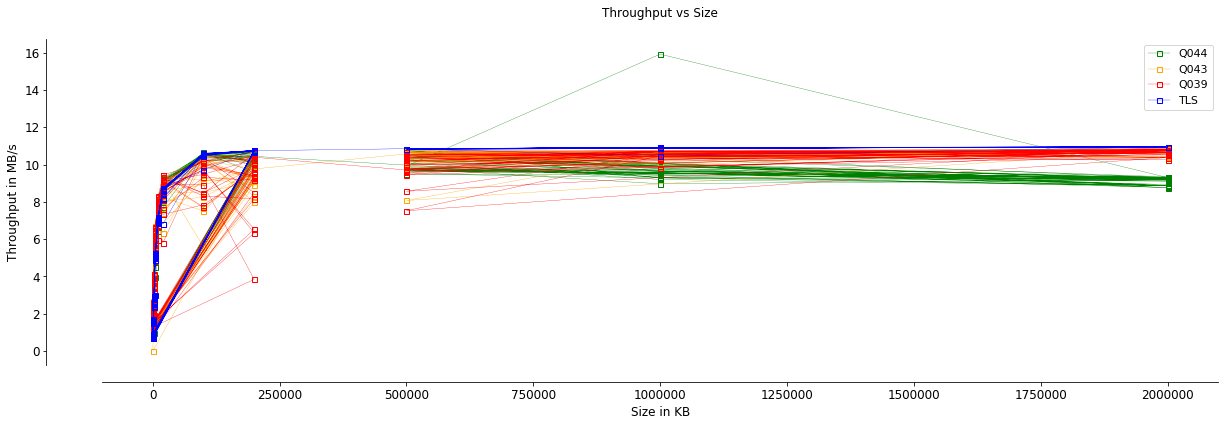

In [53]:
fig = plt.figure(figsize = (20,6))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(1000,100000000,10000)

#Quic
#plt.plot(quic4['size'], quic4['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
plt.plot(quic44['size'], quic44['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
plt.plot(quic43['size'], quic43['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
plt.plot(quic39['size'], quic39['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')

plt.plot(tcp4['size'], tcp4['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')

ax = fig.axes[0]
ax.grid(False)

#ax.set_xscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Size in KB', fontsize=12)
ax.set_ylabel('Throughput in MB/s', fontsize=12)

plt.legend(['Q044', 'Q043','Q039','TLS'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Throughput vs Size', fontsize=12, y=1.05)
plt.savefig('./plots/PI/gdrive/Throughputvssize.png', format='png', bbox_inches='tight')

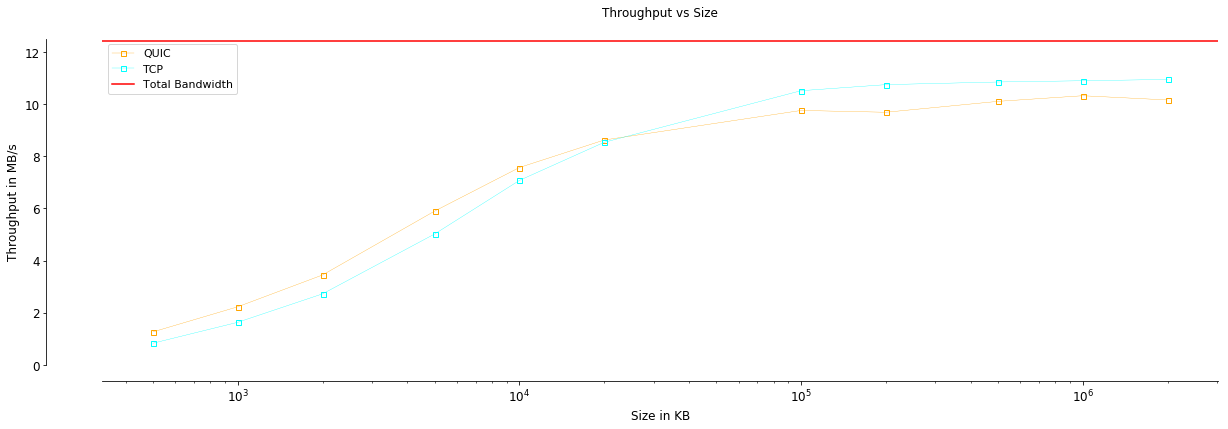

In [54]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(1000,100000000,10000)

#Quic
plt.plot(quic_mean['size'], quic_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
# plt.plot(quic_mean44['size'], quic_mean44['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
# plt.plot(quic_mean43['size'], quic_mean43['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
# plt.plot(quic_mean39['size'], quic_mean39['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
plt.plot(tcp_mean['size'], tcp_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
plt.axhline(y=total_bandwidth, color='r', linestyle='-')
ax = fig.axes[0]
ax.grid(False)
ax.set_ylim([0,12.5])
#ax.set_xscale('linear')
ax.set_xscale('log')
ax.set_xlabel('Size in KB', fontsize=12)
ax.set_ylabel('Throughput in MB/s', fontsize=12)

plt.legend(['QUIC', 'TCP', 'Total Bandwidth'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Throughput vs Size', fontsize=12, y=1.05)
plt.savefig('./plots/PI/gdrive/MeanThroughputvssize.png', format='png', bbox_inches='tight')